# Clasificaciones usando muestra de tamaño 5000

In [1]:
import pickle

import numpy as np

import pandas as pd

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from libs.container import Container
from libs.display import d
from libs.experiment import KFoldExperiment, WithAnotherExperiment, roc

In [2]:
sample = pd.read_pickle("data/ogle3_only/scaled/s5k.pkl.bz2")
sample["tile"] = sample["id"].apply(lambda i: "b" + str(i)[1:4])
sample["cls"] = sample.vs_type.apply(lambda x: 0 if x == "" else 1)

In [3]:
no_features = ["id", "vs_catalog", "vs_type", "ra_k", "dec_k", "tile", "cls"] 
X_columns = [c for c in sample.columns if c not in no_features]

grouped = sample.groupby("tile")
data = Container({k: grouped.get_group(k).copy() for k in grouped.groups.keys()})

del grouped, sample

## Features

In [4]:
cls = {0:0, 1:1}

In [5]:
d(X_columns)

1. cnt
2. Amplitude
3. AndersonDarling
4. Autocor_length
5. Beyond1Std
6. CAR_mean
7. CAR_sigma
8. CAR_tau
9. Con
10. Eta_e
11. FluxPercentileRatioMid20
12. FluxPercentileRatioMid35
13. FluxPercentileRatioMid50
14. FluxPercentileRatioMid65
15. FluxPercentileRatioMid80
16. Freq1_harmonics_amplitude_0
17. Freq1_harmonics_amplitude_1
18. Freq1_harmonics_amplitude_2
19. Freq1_harmonics_amplitude_3
20. Freq1_harmonics_rel_phase_0
21. Freq1_harmonics_rel_phase_1
22. Freq1_harmonics_rel_phase_2
23. Freq1_harmonics_rel_phase_3
24. LinearTrend
25. MaxSlope
26. Mean
27. Meanvariance
28. MedianAbsDev
29. MedianBRP
30. PairSlopeTrend
31. PercentAmplitude
32. PercentDifferenceFluxPercentile
33. PeriodLS
34. Period_fit
35. Psi_CS
36. Psi_eta
37. Q31
38. Rcs
39. Skew
40. SmallKurtosis
41. Std
42. StetsonK
43. c89_jk_color
44. c89_hk_color
45. c89_jh_color
46. n09_jk_color
47. n09_hk_color
48. n09_jh_color
49. c89_m2
50. c89_m4
51. c89_c3
52. n09_m2
53. n09_m4
54. n09_c3
55. AmplitudeH
56. AmplitudeJ
57. ppmb
58. AmplitudeJH
59. AmplitudeJK

## b278 - K-Folds

In [6]:
%%time
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_linear = svc_linear("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      4983
        1.0       0.91      0.54      0.68       423

avg / total       0.96      0.96      0.96      5406

--------------------------------------------------------------------------------
CPU times: user 30.3 s, sys: 12 ms, total: 30.4 s
Wall time: 30.4 s


In [7]:
%%time
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_poly = svc_poly("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.95      0.99      0.97      4983
        1.0       0.85      0.45      0.59       423

avg / total       0.95      0.95      0.94      5406

--------------------------------------------------------------------------------
CPU times: user 18.3 s, sys: 4 ms, total: 18.3 s
Wall time: 18.3 s


In [8]:
%%time
svc_rbf = KFoldExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls,
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_rbf = svc_rbf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      4983
        1.0       0.91      0.53      0.67       423

avg / total       0.96      0.96      0.95      5406

--------------------------------------------------------------------------------
CPU times: user 29.8 s, sys: 24 ms, total: 29.8 s
Wall time: 30.1 s


In [9]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
rf = rf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      4983
        1.0       0.92      0.78      0.85       423

avg / total       0.98      0.98      0.98      5406

--------------------------------------------------------------------------------
CPU times: user 2min 12s, sys: 60 ms, total: 2min 12s
Wall time: 2min 12s


In [10]:
%%time
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
knn = knn("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.97      4983
        1.0       0.87      0.46      0.60       423

avg / total       0.95      0.95      0.95      5406

--------------------------------------------------------------------------------
CPU times: user 5.96 s, sys: 4 ms, total: 5.96 s
Wall time: 5.98 s


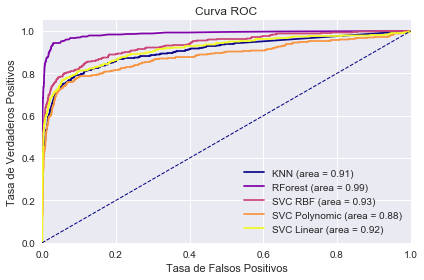

In [11]:
roc({"KNN": knn, "RForest": rf, 
     "SVC RBF": svc_rbf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})

## b278 vs. Los demas

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4992
          1       0.88      0.62      0.73       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.89      0.59      0.71       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4991
          1       0.86      0.68      0.76       221

avg / total       0.98      0.98      0.98      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

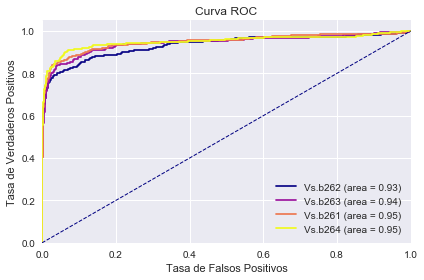

CPU times: user 20.3 s, sys: 220 ms, total: 20.5 s
Wall time: 20.3 s


In [12]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear("b278"))

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      4992
          1       0.85      0.57      0.69       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4997
          1       0.82      0.51      0.63       305

avg / total       0.96      0.97      0.96      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4991
          1       0.78      0.61      0.68       221

avg / total       0.97      0.98      0.97      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

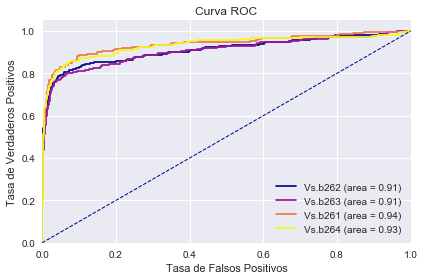

CPU times: user 14.2 s, sys: 236 ms, total: 14.5 s
Wall time: 14.1 s


In [13]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly("b278"))

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.91      0.63      0.74       296

avg / total       0.97      0.98      0.97      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4997
          1       0.89      0.57      0.70       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4991
          1       0.87      0.69      0.77       221

avg / total       0.98      0.98      0.98      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

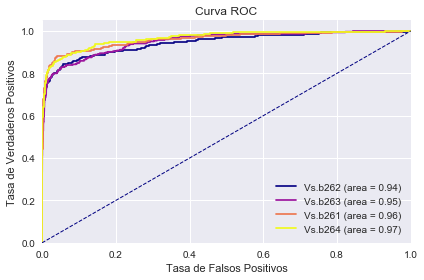

CPU times: user 19 s, sys: 248 ms, total: 19.3 s
Wall time: 18.9 s


In [14]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf("b278"))

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4992
          1       0.96      0.79      0.87       296

avg / total       0.99      0.99      0.99      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4997
          1       0.97      0.77      0.86       305

avg / total       0.98      0.99      0.98      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      4991
          1       0.93      0.84      0.88       221

avg / total       0.99      0.99      0.99      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

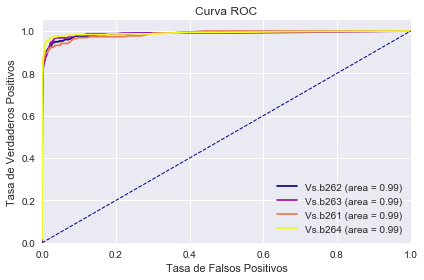

CPU times: user 54.2 s, sys: 592 ms, total: 54.8 s
Wall time: 54.2 s


In [15]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf("b278"))

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      4992
          1       0.84      0.59      0.70       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4997
          1       0.81      0.51      0.63       305

avg / total       0.96      0.97      0.96      5302

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4991
          1       0.80      0.61      0.69       221

avg / total       0.98      0.98      0.98      5212

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

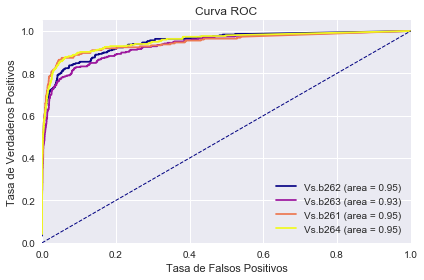

CPU times: user 31.8 s, sys: 288 ms, total: 32.1 s
Wall time: 31.7 s


In [16]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn("b278"))

## b261 vs. Los demas

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.91      0.63      0.74       296

avg / total       0.97      0.98      0.97      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.91      0.63      0.75       305

avg / total       0.97      0.98      0.97      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      4983
          1       0.94      0.49      0.64       423

avg / total       0.96      0.96      0.95      5406

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

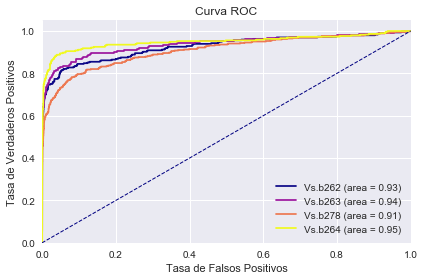

CPU times: user 10.3 s, sys: 288 ms, total: 10.6 s
Wall time: 10.2 s


In [17]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4992
          1       0.93      0.52      0.67       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4997
          1       0.86      0.48      0.62       305

avg / total       0.96      0.97      0.96      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      4983
          1       0.94      0.39      0.55       423

avg / total       0.95      0.95      0.94      5406

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

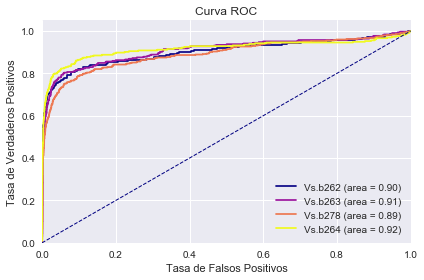

CPU times: user 7.22 s, sys: 244 ms, total: 7.46 s
Wall time: 7.13 s


In [18]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.97      0.59      0.73       296

avg / total       0.98      0.98      0.97      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      4997
          1       0.92      0.56      0.70       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      4983
          1       0.95      0.48      0.63       423

avg / total       0.96      0.96      0.95      5406

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

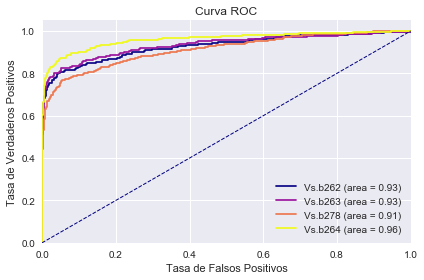

CPU times: user 9.35 s, sys: 248 ms, total: 9.6 s
Wall time: 9.26 s


In [19]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.98      0.74      0.84       296

avg / total       0.98      0.98      0.98      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.99      0.72      0.84       305

avg / total       0.98      0.98      0.98      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      4983
          1       0.97      0.68      0.80       423

avg / total       0.97      0.97      0.97      5406

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

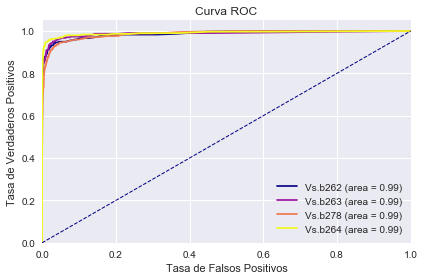

CPU times: user 50.1 s, sys: 428 ms, total: 50.5 s
Wall time: 50 s


In [20]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4992
          1       0.90      0.50      0.65       296

avg / total       0.97      0.97      0.96      5288

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4997
          1       0.86      0.46      0.60       305

avg / total       0.96      0.96      0.96      5302

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      4983
          1       0.93      0.40      0.56       423

avg / total       0.95      0.95      0.94      5406

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

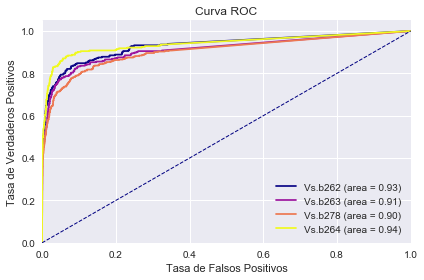

CPU times: user 31.3 s, sys: 308 ms, total: 31.6 s
Wall time: 31.3 s


In [21]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn("b261"))

## b278 + b261 vs. Los demas

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.91      0.62      0.74       296

avg / total       0.97      0.98      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.90      0.60      0.72       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4998
          1       0.94      0.65      0.77       294

avg / total       0.98      0.98      0.98      5292

--------------------------------------------------------------------------------


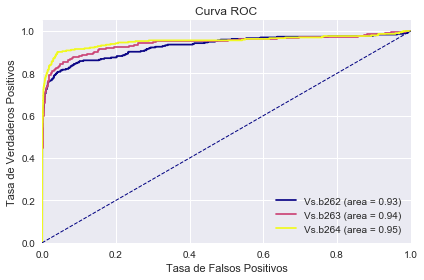

CPU times: user 40.5 s, sys: 276 ms, total: 40.8 s
Wall time: 40.5 s


In [22]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.93      0.58      0.71       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4997
          1       0.88      0.53      0.66       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      4998
          1       0.91      0.56      0.69       294

avg / total       0.97      0.97      0.97      5292

--------------------------------------------------------------------------------


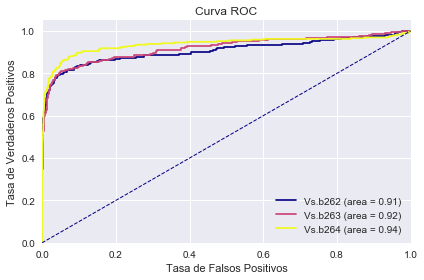

CPU times: user 25.5 s, sys: 268 ms, total: 25.8 s
Wall time: 25.5 s


In [23]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.95      0.64      0.76       296

avg / total       0.98      0.98      0.98      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.91      0.60      0.72       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4998
          1       0.96      0.63      0.76       294

avg / total       0.98      0.98      0.98      5292

--------------------------------------------------------------------------------


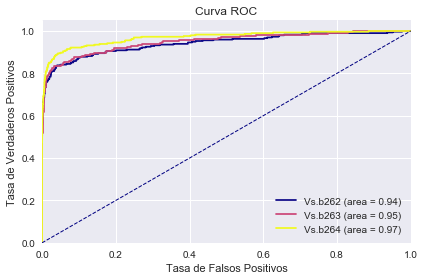

CPU times: user 28 s, sys: 272 ms, total: 28.3 s
Wall time: 28 s


In [24]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4992
          1       0.97      0.79      0.87       296

avg / total       0.99      0.99      0.99      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4997
          1       0.98      0.78      0.87       305

avg / total       0.99      0.99      0.99      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4998
          1       0.97      0.84      0.90       294

avg / total       0.99      0.99      0.99      5292

--------------------------------------------------------------------------------


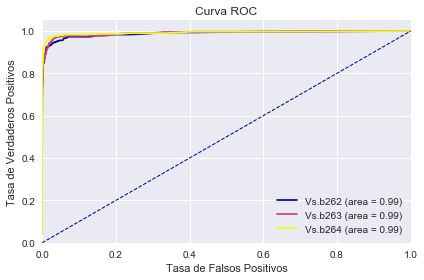

CPU times: user 1min 18s, sys: 380 ms, total: 1min 19s
Wall time: 1min 18s


In [25]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4992
          1       0.86      0.60      0.71       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4997
          1       0.83      0.52      0.64       305

avg / total       0.96      0.97      0.96      5302

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      4998
          1       0.86      0.57      0.69       294

avg / total       0.97      0.97      0.97      5292

--------------------------------------------------------------------------------


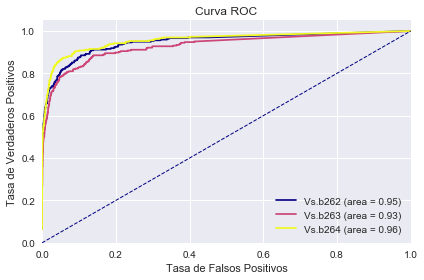

CPU times: user 44.4 s, sys: 288 ms, total: 44.7 s
Wall time: 44.5 s


In [26]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn(["b278", "b261"]))

## b278 + b261 + b264 vs. Los demas

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4992
          1       0.88      0.64      0.74       296

avg / total       0.97      0.98      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.91      0.62      0.74       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------


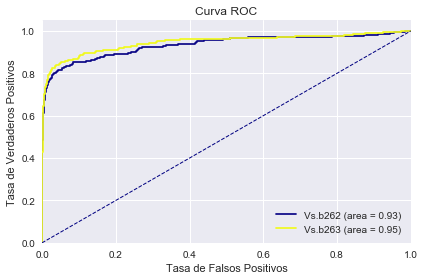

CPU times: user 53.9 s, sys: 732 ms, total: 54.6 s
Wall time: 54.3 s


In [27]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.89      0.59      0.71       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4997
          1       0.89      0.55      0.68       305

avg / total       0.97      0.97      0.97      5302

--------------------------------------------------------------------------------


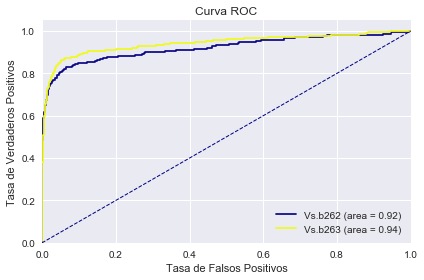

CPU times: user 41.3 s, sys: 640 ms, total: 41.9 s
Wall time: 41.8 s


In [28]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4992
          1       0.94      0.64      0.76       296

avg / total       0.98      0.98      0.98      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      4997
          1       0.94      0.63      0.75       305

avg / total       0.98      0.98      0.97      5302

--------------------------------------------------------------------------------


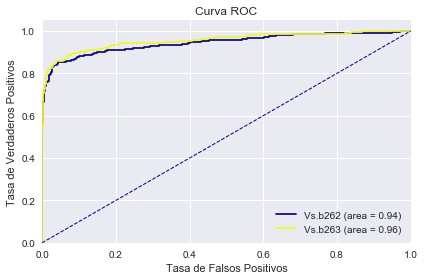

CPU times: user 43.7 s, sys: 676 ms, total: 44.4 s
Wall time: 44.3 s


In [29]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4992
          1       0.97      0.80      0.88       296

avg / total       0.99      0.99      0.99      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4997
          1       0.98      0.79      0.87       305

avg / total       0.99      0.99      0.99      5302

--------------------------------------------------------------------------------


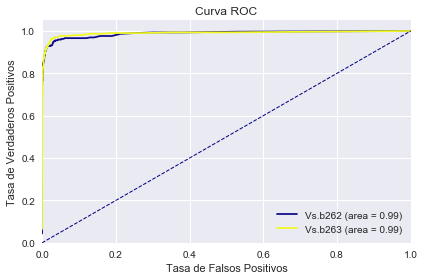

CPU times: user 1min 20s, sys: 320 ms, total: 1min 20s
Wall time: 1min 20s


In [30]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4992
          1       0.86      0.62      0.72       296

avg / total       0.97      0.97      0.97      5288

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4997
          1       0.82      0.56      0.66       305

avg / total       0.96      0.97      0.96      5302

--------------------------------------------------------------------------------


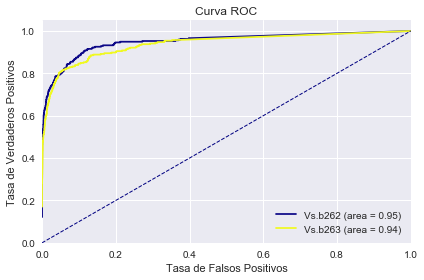

CPU times: user 58 s, sys: 240 ms, total: 58.3 s
Wall time: 58.2 s


In [31]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn(["b278", "b261", "b264"]))